# Dossier - Traitement d'images : le débruitage

In [ ]:
# imports
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
print(ski.__version__)

# I - Signal to Noise Ratio (SNR)

In [40]:
def snr(original_image, measured_image):
    # Convert images to float
    original_image = original_image.astype(float)
    measured_image = measured_image.astype(float)
    # Calculate the signal power
    signal_power = np.sum(np.abs(measured_image) ** 2)

    # Calculate the noise power
    noise_image = original_image - measured_image
    noise_power = np.sum(np.abs(noise_image) ** 2)

    # Calculate the SNR in dB
    snr = 10 * np.log10(signal_power / noise_power)
    return snr


In [41]:
img1, img2 = ski.io.imread('./Resources/referenceSNR/image1_reference.png', as_gray=True), ski.io.imread('./Resources/referenceSNR/image1_bruitee_snr_22.2912.png', as_gray=True)

snr(img1, img2)

22.291183863447763

# II - Image Noise

## Gaussian filter

In [ ]:
def add_gaussian_noise(image, mean, sigma):
    """Adds Gaussian noise to an image.

    Args:
        image : The input image as a NumPy array.
        mean : Mean of the Gaussian noise.
        sigma : Standard deviation of the Gaussian noise.
        
    Returns:
        The image with added Gaussian noise as a NumPy array.
    """
    # Create a Gaussian noise matrix with the same shape as the input image
    gaussian_noise = np.random.normal(mean, sigma, size=image.shape)
    
    # Clip the values to the 0-255 range (assuming the image is in the 8-bit grayscale format)
    noisy_image = np.clip(image + gaussian_noise, 0, 255)
    
    # Normalize the noise to the range [0, 1] for display purposes
    normalized_noise = (gaussian_noise - gaussian_noise.min()) / (gaussian_noise.max() - gaussian_noise.min())
    
    # Show the noisy image
    plt.figure(figsize=(10, 10))
    plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=255)
    plt.title('Image with Gaussian Noise')
    plt.xlabel('X-Axis (Pixels)')
    plt.ylabel('Y-Axis (Pixels)')
    plt.show()
    
    # Plot a histogram of the normalized noise values
    plt.hist(normalized_noise.ravel(), bins=256, range=(0, 1), density=True)
    plt.title('Histogram of Gaussian Noise')
    plt.xlabel('Normalized Noise Value')
    plt.ylabel('Frequency')
    plt.show()

    return noisy_image

    

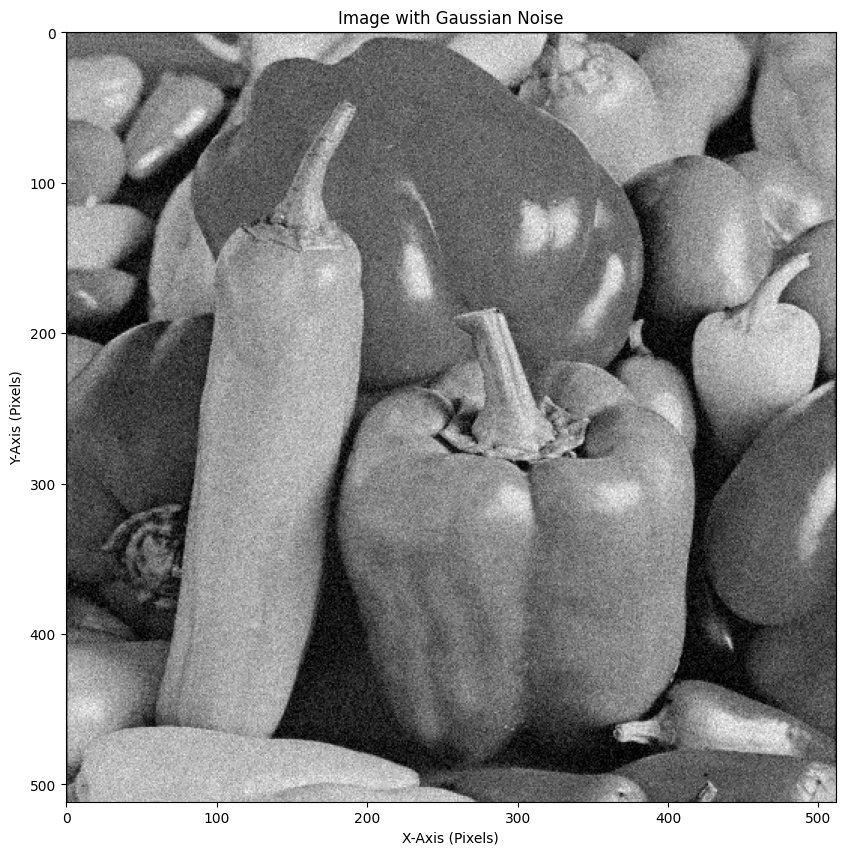

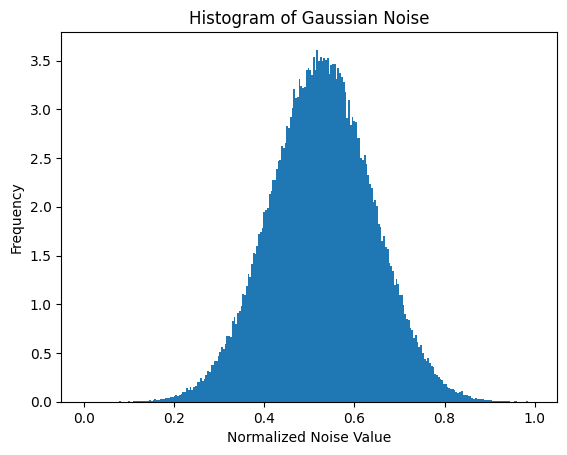

18.854294035198798


In [42]:
img = ski.io.imread('Resources/referenceSNR/image1_reference.png', as_gray=True)
noisy_img = add_gaussian_noise(img, 0, 15)
print(snr(img, noisy_img))

## Multiplicative Noise (log-normal distribution)

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def add_multiplicative_noise(image, mean, sigma):
    """Adds multiplicative noise to an image using a log-normal distribution.

    Args:
        image : The input image as a NumPy array.
        mean : Mean of the log-normal distribution.
        sigma : Standard deviation of the log-normal distribution.
        
    Returns:
        The image with added multiplicative noise as a NumPy array.
    """
    # Generate multiplicative noise using a log-normal distribution
    noise = np.random.lognormal(mean, sigma, size=image.shape)
    
    # Apply the noise to the image by element-wise multiplication
    noisy_image = image * noise
    
    # Clip the values to the 0-255 range (assuming the image is in the 8-bit grayscale format)
    noisy_image = np.clip(noisy_image, 0, 255)
    
    # Show the noisy image with labels for the axes
    plt.figure(figsize=(10, 10))
    plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=255)
    plt.title('Image with Multiplicative Noise')
    plt.xlabel('X-Axis (Pixels)')
    plt.ylabel('Y-Axis (Pixels)')
    plt.show()

    return noisy_image


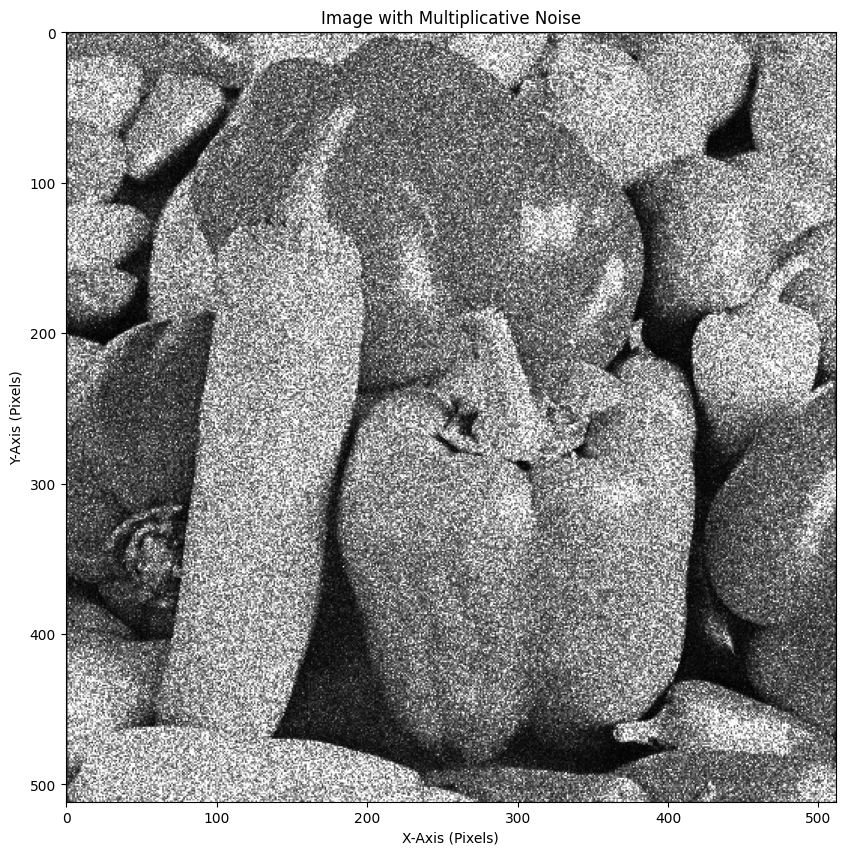

8.478663272021041


In [45]:
img = ski.io.imread('Resources/referenceSNR/image1_reference.png', as_gray=True)
noisy_img = add_multiplicative_noise(img, 0, 0.5)
print(snr(img, noisy_img))

## “salt and pepper” noise

In [46]:
def add_salt_pepper_noise(image, prob):
    """Adds salt and pepper noise to an image.
    
    Args:
        image: The input image.
        prob: Probability of the noise.
    
    Returns:
        The image with salt and pepper noise.
    """
    # get the dimensions of the image
    row, col = image.shape
    # randomly pick some pixels in the 
    # image for coloring them white
    # pick the num pixels using the probability passed
    num_pix = int(prob*row*col)
    for i in range(num_pix):
        # pick a random position
        x = np.random.randint(0, row-1)
        y = np.random.randint(0, col-1)
        # color that position white
        image[x, y] = 255
        # pick another random position
        x = np.random.randint(0, row-1)
        y = np.random.randint(0, col-1)
        # color that position black
        image[x, y] = 0

    # return the image with salt and pepper noise added
    return image



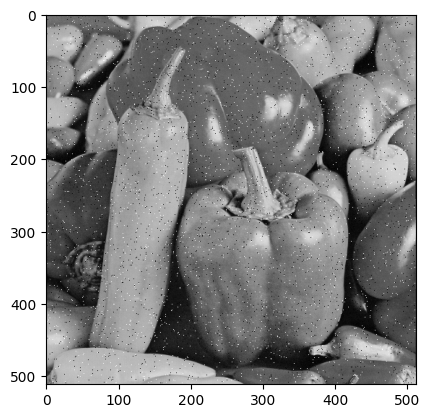

16.5922425305757


In [47]:
# apply salt and pepper noise to the image
image = ski.io.imread("Resources/referenceSNR/image1_reference.png")
image = add_salt_pepper_noise(image, 0.01)
# display the noisy image
plt.imshow(image, cmap='gray')
plt.show()
print(snr(img, image))


# III - Image Denoising with filters

## Convolution filter

In [29]:
def convolution_filter(image, kernel):
    """
    Applies a convolution filter to an image
    
    :param image: image to filter
    :param kernel: convolution filter
    :return: filtered image
    """
    # Get the image dimensions
    height, width = image.shape

    # Get the kernel dimensions
    k_height, k_width = kernel.shape

    # Create a padded image
    padded_image = np.pad(image, ((k_height//2, k_height//2), (k_width//2, k_width//2)), mode='constant')

    # Create an empty output image
    filtered_image = np.zeros_like(image)

    # Apply the convolution operation
    for i in range(height):
        for j in range(width):
            patch = padded_image[i:i+k_height, j:j+k_width]
            filtered_image[i, j] = np.sum(patch * kernel)

    return filtered_image
    

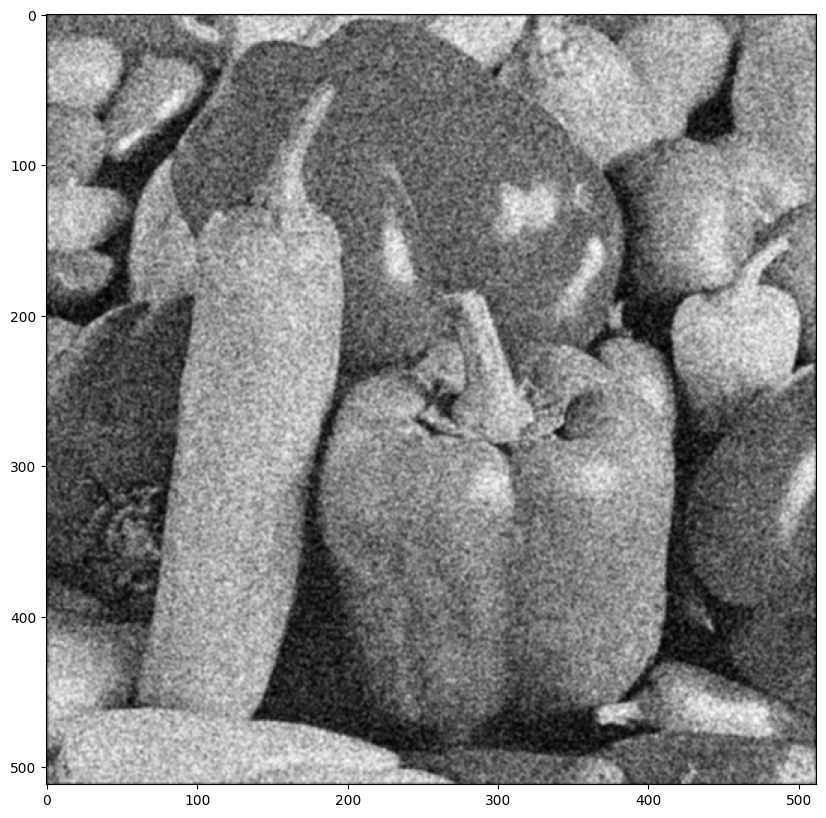

16.749592038879975
inf


C:\Users\RENDU\AppData\Local\Temp\ipykernel_13060\871474914.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)


In [50]:
image = ski.io.imread("Resources/referenceSNR/image1_bruitee_snr_9.2885.png")
kernel = np.array([[1/16, 1/8, 1/16],[1/8, 1/4, 1/8],[1/16, 1/8, 1/16]])
filtered_image = convolution_filter(image, kernel)
plt.figure(figsize=(10, 10))
plt.imshow(filtered_image, cmap='gray')
plt.show()
print(snr(img, filtered_image))
print(snr(img, img))